In [1]:
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from random import seed
from random import randint

seed(1)

class FloorModel(ap.Model):
    
    def setup(self):
        self.counter = 0

        # Create agents (vaccums & dirty tiles)
        n_vaccums = int(self.p['vaccums'])
        self.vaccums = self.agents = ap.AgentList(self, n_vaccums)
        
        n_dirt = int(self.p['dirt density'] * (self.p['height'] * self.p['length']))
        self.dirt = self.agents = ap.AgentList(self, n_dirt)

        # Create grid (floor)
        self.floor = ap.Grid(self, (self.p['height'], self.p['length']), track_empty=True)
        self.floor.add_agents(self.dirt, random=True, empty=True)
        
        tuples = []
        for i in range(n_vaccums):
            tuples.append((1,1))
        self.floor.add_agents(self.vaccums, tuples, random=False, empty=True)

        # Initiate a dynamic variable for all tiles
        # Condition 0: Dirty, 1: Clean
        self.dirt.condition = 0
        self.vaccums.condition = 2

    def step(self):

        # Clean tiles
        for vaccum in self.vaccums:
            for neighbor in self.floor.neighbors(vaccum, distance = 0):
                if neighbor.condition == 0:
                    neighbor.condition = 1 # Neighbor gets cleaned
                    break
            else:
                self.floor.move_by(vaccum, (randint(-1,1), randint(-1,1)))
                self.counter += 1

        # Stop simulation if all tiles are clean
        dirty_tiles = self.dirt.select(self.dirt.condition == 0)
        if len(dirty_tiles) == 0:
            self.stop()

    def end(self):

        # Document a measure at the end of the simulation
        cleaned_tiles = len(self.agents.select(self.agents.condition == 1))
        self.report('Percentage of cleaned tiles',
                    cleaned_tiles / int(self.p['dirt density'] * (self.p['height'] * self.p['length'])))
        self.report('Time', self.t)
        self.report('Total # of movements of vaccums', self.counter)
        self.report('Number of vaccums', len(self.vaccums))
        
# Define parameters

parameters = {
    'vaccums': 15,
    'dirt density': 0.2, # Percentage of grid covered by trees
    'height': 15, # Height and length of the grid
    'length': 25,
    'steps': 250,
}

# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.floor.attr_grid('condition')
    color_dict = {0:'#804000', 1:'#00aae4', 2:'#828282', None:'#ffffff'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Vaccums Simulation\n"
                 f"Time-step: {model.t}, Dirty tiles left: "
                 f"{len(model.dirt.select(model.dirt.condition == 0))}")

fig, ax = plt.subplots()
model = FloorModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))

In [2]:
# Prepare parameter sample
parameters = {
    'vaccums': ap.Range(5,30),
    'dirt density': 0.2,
    'height': 15, # Height and length of the grid
    'length': 25,
    'steps': 900,
}
sample = ap.Sample(parameters, n=30)

# Perform experiment
exp = ap.Experiment(FloorModel, sample, iterations=5)
results = exp.run()

Scheduled runs: 150
Completed: 150, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:25.618347


In [3]:
# Save and load data
results.save()
results = ap.DataDict.load('FloorModel')

Data saved to ap_output/FloorModel_5
Loading from directory ap_output/FloorModel_5/
Loading info.json - Successful
Loading parameters_constants.json - Successful
Loading parameters_log.json - Successful
Loading parameters_sample.csv - Successful
Loading reporters.csv - Successful


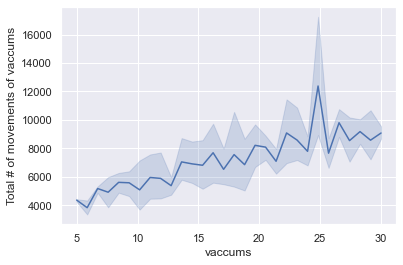

In [4]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='vaccums',
    y='Total # of movements of vaccums'
);

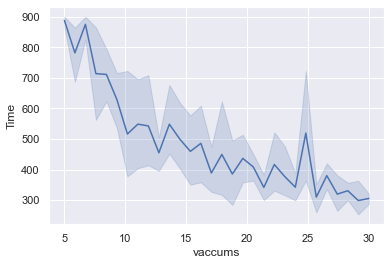

In [5]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='vaccums',
    y='Time'
);

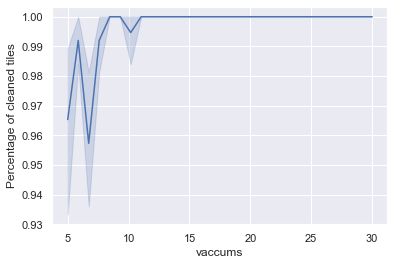

In [6]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='vaccums',
    y='Percentage of cleaned tiles'
);